In [210]:
import pandas as pd

url = "https://raw.githubusercontent.com/pilatova/prot-viz-data/test/dist2.tsv"

dist = pd.read_csv(
    url,
    sep='\t',           # Tab separator for TSV files
    header=0,           # Use the first row as headers
    index_col=0         # Set the first column ("protein_id") as the index
)

display(dist)

,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,
A0A087WTH1,0.029031,0.154998,0.110481,0.196955,0.344118,0.144013,0.109375,0.232052,0.385447,0.138486,0.217262,0.389459,0.192162,0.368851,0.437878
A0A087WZ39,0.103670,0.377518,0.391924,0.578767,0.941801,0.453725,0.498146,0.613333,1.076725,0.406620,0.474470,0.844741,0.525629,0.926316,1.071503
A0A096LP49,0.160867,0.640212,0.633581,0.685461,2.314668,0.667860,0.642229,0.718148,2.226590,0.552318,0.822833,2.328829,0.775940,2.277628,2.473843
A0A0U1RRA0,0.016778,0.143482,0.109374,0.167911,0.544500,0.162434,0.128345,0.148527,0.536199,0.088828,0.183459,0.661912,0.089641,0.556196,0.551611
A0A126GWI2,0.061848,0.209570,0.176613,0.199606,0.276475,0.206727,0.171825,0.195499,0.269331,0.161940,0.212899,0.259762,0.185132,0.232008,0.252956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y8,0.020182,0.097383,0.087803,0.145415,0.200164,0.092122,0.083755,0.143263,0.199263,0.072680,0.137832,0.189800,0.135092,0.196943,0.242393
Q9Y6Y9,0.078279,0.493353,0.340358,0.497160,0.827787,0.468792,0.350418,0.504158,0.774873,0.306680,0.520962,0.909269,0.459060,0.850035,0.937334
Q9Y6Z7,0.011360,0.070712,0.066309,0.125549,0.252660,0.070417,0.066584,0.129581,0.242320,0.054214,0.143420,0.219843,0.142122,0.222810,0.280857


In [211]:
import numpy as np
melted = pd.DataFrame()
proteins = []
pairs = []
vals = []
for prot in dist.index:
  for pair in dist.columns:
    proteins.append(prot)
    pairs.append(pair)
    vals.append(dist.loc[prot, pair])
melted['protein_id'] = proteins
melted['value'] = vals
melted['pair'] = pairs
sorted = melted.sort_values('value')
sorted = sorted.query('value > 0')
lowest = sorted[:100].drop('pair', axis = 1)
lowest2 = sorted.query('value < 0.00002')
display(len(lowest2))
highest = sorted.tail(100).drop('pair', axis = 1)
#tabulka lowest vyberie prvych 100 riadkov tabulky dist, teda 100 najnizsich hodnot, to iste highest, len 100 najvyssich hodnot
most_freq_lowest = lowest.value_counts()
most_freq_lowest = most_freq_lowest.reset_index().set_index('protein_id')
most_freq_lowest = most_freq_lowest.query('count > 1')
highest = highest.set_index('protein_id')
#most_freq_lowest tabulka je tabulka, ktora pocita kolko krat sa dany protein nachadza v tabulke lowest, teda nam hovori ake proteiny maju medzi kolko parmi najmensie rozdiely
#tabulka lowest by sa dala robit z ovela viac ako prvych 100, kedze hodnot == 0,0001 je az len(lowest2), teda vyse 4000. Avsak vacsina z nich by mala count 1, cize myslim,
#ze analyzovat vsetkych 4000 ktore maju count 1 je zbytocne a staci sa nam zamerat na tie, ktore maju count aspon 2

display(most_freq_lowest)
#v highest sa nenachadzaju proteiny s rovnako vysokou hodnotou medzi viacerymi parmi, cize count je vzdy 1, takze most_frequent highest nerobim
most_freq_highest = highest.tail(len(most_freq_lowest))
display(most_freq_highest)

4547

,value,count
protein_id,,
P60059,0.00001,15
P60002,0.00001,10
P59998,0.00001,10
P62917,0.00001,10
Q6UXN9,0.00001,10
Q7RTV0,0.00001,10
P62910,0.00001,3
Q9NWB6,0.00001,3
Q9UBE8,0.00001,3


,value
protein_id,
Q17RF5,2.516389
Q8N5Q1,2.568131
Q6ZQX7,2.599157
Q53H47,2.735270
Q6ZQX7,2.746796
Q8N5Q1,2.782719
Q8N5Q1,2.916768
Q8N5Q1,3.005446
P26951,3.030621


In [212]:
url2 = "https://raw.githubusercontent.com/pilatova/prot-viz-data/refs/heads/main/goslim.tsv"
id = pd.read_csv(
    url2,
    sep='\t',
    header=0,
    index_col=0
)

most_freq_lowest_id = []
most_freq_highest_id = []

m_f_l_reset = most_freq_lowest.reset_index()
m_f_h_reset = most_freq_highest.reset_index()

# vytvaram zoznam id proteinov v tabulke most_freq_lowest (v stlpci 'protein_id')
for protein_id in m_f_l_reset['protein_id']:
    most_freq_lowest_id.append(protein_id)

# vytvaram zoznam id proteinov v tabulke most_freq_highest (v stlpci 'protein_id')
for protein_id in m_f_h_reset['protein_id']:
    most_freq_highest_id.append(protein_id)

# tabulka most_freq_tab obsahuje iba tie riadky, ktorych indexy sa nachadzaju v zozname most_freq_lowest_id
most_freq_tab = id.loc[id.index.isin(most_freq_lowest_id)]
display(most_freq_tab)

# tabulka most_freq_highest_tab obsahuje iba tie riadky, ktorych indexy sa nachadzaju v zozname most_freq_highest_id
most_freq_highest_tab = id.loc[id.index.isin(most_freq_highest_id)]
display(most_freq_highest_tab)

,go_id
protein_id,
P59998,GO:0005198
P59998,GO:0005576
P59998,GO:0005615
P59998,GO:0005634
P59998,GO:0005694
...,...
Q9UBE8,GO:0016740
Q9UBE8,GO:0023052
Q9UBE8,GO:0036211


,go_id
protein_id,
P26951,GO:0005886
P26951,GO:0023052
P26951,GO:0060089
P26951,GO:0023052
P26951,GO:0060089
Q17RF5,GO:0005576
Q17RF5,GO:0048856
Q53H47,GO:0000278
Q53H47,GO:0003677


In [213]:
url3 = "https://raw.githubusercontent.com/pilatova/prot-viz-data/refs/heads/main/goslim-names.tsv"
functions = pd.read_csv(
    url3,
    sep='\t',
    header=0,
    index_col=0
)

# tato bunka obsahuje uplne rovnaky kod ako ta predosla, akurat pracuje s inou tabulkou

most_freq_tab_go_id = []
most_freq_highest_tab_go_id = []

m_f_t_reset = most_freq_tab.reset_index()
m_f_h_t_reset = most_freq_highest_tab.reset_index()

for go_id in m_f_t_reset['go_id']:
    most_freq_tab_go_id.append(go_id)

for go_id in m_f_h_t_reset['go_id']:
  most_freq_highest_tab_go_id.append(go_id)

# tabulka most_freq_go_id_tab obsahuje go_id a funkcie najviac zastupenych proteinov v tabulke most_freq_lowest
most_freq_go_id_tab = functions.loc[functions.index.isin(most_freq_tab_go_id)]
display(most_freq_go_id_tab)

# tabulka most_freq_highest_go_id_tab obsahuje go_id a funkcie najviac zastupenych proteinov v tabulke most_freq_highest
most_freq_highest_go_id_tab = functions.loc[functions.index.isin(most_freq_highest_tab_go_id)]
display(most_freq_highest_go_id_tab)


,name
go_id,
GO:0000278,mitotic cell cycle
GO:0002181,cytoplasmic translation
GO:0002376,immune system process
GO:0003677,DNA binding
GO:0003723,RNA binding
GO:0003824,catalytic activity
GO:0003924,GTPase activity
GO:0005198,structural molecule activity
GO:0005215,transporter activity


,name
go_id,
GO:0000278,mitotic cell cycle
GO:0003677,DNA binding
GO:0003824,catalytic activity
GO:0005576,extracellular region
GO:0005634,nucleus
GO:0005694,chromosome
GO:0005730,nucleolus
GO:0005886,plasma membrane
GO:0006260,DNA replication


In [214]:
most_freq_tab_reset = most_freq_tab.reset_index()
most_freq_go_id_tab_reset = most_freq_go_id_tab.reset_index()

# spojenie tabuliek do jednej cez 'go_id'
tab_merged_lowest = pd.merge(
    most_freq_tab_reset,
    most_freq_go_id_tab_reset,
    on='go_id',
    how='inner'
)


tab_lowest_functions = tab_merged_lowest[['protein_id', 'name']].set_index(['protein_id', 'name'])

display(tab_lowest_functions)

Empty DataFrame
Columns: []
Index: [(P59998, structural molecule activity), (P59998, extracellular region), (P59998, extracellular space), (P59998, nucleus), (P59998, chromosome), (P59998, cytosol), (P59998, cytoskeleton), (P59998, cytoskeleton organization), (P59998, cytoskeletal protein binding), (P59998, organelle), (P59998, molecular adaptor activity), (P59998, protein-containing complex assembly), (P60002, nucleus), (P60002, nucleoplasm), (P60002, DNA-templated transcription), (P60002, organelle), (P60002, translation regulator activity), (P60006, mitotic cell cycle), (P60006, nucleus), (P60006, nucleoplasm), (P60006, cytosol), (P60006, chromosome segregation), (P60006, reproductive process), (P60006, signaling), (P60006, protein catabolic process), (P60006, organelle), (P60006, mitotic nuclear division), (P60059, transporter activity), (P60059, endoplasmic reticulum), (P60059, cytosol), (P60059, intracellular protein transport), (P60059, organelle), (P60059, transmembrane transport), (P60468, RNA binding), (P60468, endoplasmic reticulum), (P60468, cytosol), (P60468, intracellular protein transport), (P60468, protein catabolic process), (P60468, organelle), (P60468, transmembrane transport), (P62879, catalytic activity), (P62879, GTPase activity), (P62879, extracellular region), (P62879, extracellular space), (P62879, lysosome), (P62879, vacuole), (P62879, cytosol), (P62879, plasma membrane), (P62879, hydrolase activity), (P62879, signaling), (P62879, organelle), (P62879, transmembrane transport), (P62879, molecular adaptor activity), (P62888, cytoplasmic translation), (P62888, immune system process), (P62888, RNA binding), (P62888, structural molecule activity), (P62888, extracellular region), (P62888, extracellular space), (P62888, nucleus), (P62888, cytosol), (P62888, ribosome), (P62888, organelle), (P62888, defense response to other organism), (P62910, cytoplasmic translation), (P62910, RNA binding), (P62910, structural molecule activity), (P62910, cytosol), (P62910, ribosome), (P62910, organelle), (P62917, cytoplasmic translation), (P62917, RNA binding), (P62917, structural molecule activity), (P62917, nucleus), (P62917, nucleoplasm), (P62917, cytosol), (P62917, ribosome), (P62917, organelle), (Q6UXN9, nucleus), (Q6UXN9, nucleoplasm), (Q6UXN9, chromosome), (Q6UXN9, nucleolus), (Q6UXN9, DNA-templated transcription), (Q6UXN9, regulation of DNA-templated transcription), (Q6UXN9, organelle), (Q7RTV0, DNA binding), (Q7RTV0, RNA binding), (Q7RTV0, nucleus), (Q7RTV0, nucleoplasm), (Q7RTV0, DNA-templated transcription), (Q7RTV0, regulation of DNA-templated transcription), (Q7RTV0, mRNA metabolic process), (Q7RTV0, cell differentiation), (Q7RTV0, organelle), (Q7RTV0, protein-containing complex assembly), (Q9NWB6, nucleus), (Q9NWB6, nucleoplasm), (Q9NWB6, mitochondrion), (Q9NWB6, cytosol), (Q9NWB6, organelle), ...]

[111 rows x 0 columns]

In [215]:
most_freq_highest_tab_reset = most_freq_highest_tab.reset_index()
most_freq_highest_go_id_tab_reset = most_freq_highest_go_id_tab.reset_index()

# spojenie tabuliek do jednej cez 'go_id'
tab_merged_highest = pd.merge(
    most_freq_highest_tab_reset,
    most_freq_highest_go_id_tab_reset,
    on='go_id',
    how='inner'
)


tab_highest_functions = tab_merged_highest[['protein_id', 'name']].set_index(['protein_id', 'name'])

display(tab_highest_functions)

Empty DataFrame
Columns: []
Index: [(P26951, plasma membrane), (P26951, signaling), (P26951, molecular transducer activity), (P26951, signaling), (P26951, molecular transducer activity), (Q17RF5, extracellular region), (Q17RF5, anatomical structure development), (Q53H47, mitotic cell cycle), (Q53H47, DNA binding), (Q53H47, catalytic activity), (Q53H47, nucleus), (Q53H47, chromosome), (Q53H47, nucleolus), (Q53H47, DNA replication), (Q53H47, DNA repair), (Q53H47, chromatin organization), (Q53H47, transferase activity), (Q53H47, hydrolase activity), (Q53H47, signaling), (Q53H47, protein modification process), (Q53H47, organelle), (Q53H47, catalytic activity, acting on a protein), (Q53H47, catalytic activity, acting on DNA), (Q6ZQX7, nucleus), (Q6ZQX7, nucleolus), (Q6ZQX7, protein catabolic process), (Q6ZQX7, protein modification process), (Q6ZQX7, organelle), (Q6ZQX7, molecular adaptor activity)]

In [216]:
functions_tab = functions.reset_index()

# inicializovala som zoznamy, ktore obsahuju trojice (nazov_kategorie, go_id, funkcia), niektore funkcie som pridala manualne
dna = []
transport = []
nucleus = []
membrane = []
rna = [('RNA', 'GO:0042254', 'ribosome biogenesis')]
process = []
#('other', 'GO:0006091','generation of precursor metabolites and energy'), ('other', 'GO:0006914', 'autophagy'), ('other', 'GO:0006954', 'inflammatory response'), ('other', 'GO:0007018', 'microtubule-based movement'),
           #('other', 'GO:0030154', 'cell differentiation'), ('other', 'GO:0048856','anatomical structure development'), ('other', 'GO:0048870', 'cell motility'), ('other', 'GO:0055065', 'obsolete metal ion homeostasis'),
#('other', 'GO:0140053', 'mitochondrial gene expression')
immunity = [('immunity', 'GO:0098542', 'defense response to other organism'), ('immunity', 'GO:0098754', 'detoxification'), ('immunity', 'GO:0042060', 'wound healing'),
            ('immunity', 'GO:0002376', 'immune system process'), ('immunity', 'GO:0001618', 'virus receptor activity'), ('immunity', 'GO:0120274', 'virus coreceptor activity')]
metabolism = []
activity = []
division = [('division', 'GO:0140013', 'meiotic nuclear division'), ('division', 'GO:0140014', 'mitotic nuclear division'), ('division', 'GO:0022414', 'reproductive process')]
extracellular = []
cytoplasm = []
chromosomes = [('chromosomes', 'GO:0000228', 'nuclear chromosome')]
protein = [('proteins', 'GO:0030163', 'protein catabolic process'), ('proteins', 'GO:0036211', 'protein modification process'), ('proteins', 'GO:0140096', 'catalytic activity, acting on a protein'), ('proteins', 'GO:0031386', 'protein tag activity')]
organization = []
binding = []
cytoskeleton = []
signaling = []
other = []
organelles = [('organelles', 'GO:0005739', 'mitochondrion'), ('organelles', 'GO:0005764', 'lysosome'), ('organelles', 'GO:0005768', 'endosome'), ('organelles', 'GO:0005773', 'vacuole'),
              ('organelles', 'GO:0005777', 'peroxisome'), ('organelles', 'GO:0005783', 'endoplasmic reticulum'), ('organelles', 'GO:0005794', 'Golgi apparatus'), ('organelles', 'GO:0005811', 'lipid droplet'),
              ('organelles', 'GO:0005815', 'microtubule organizing center'), ('organelles', 'GO:0005840','ribosome'), ('organelles', 'GO:0005886','plasma membrane'),
              ('organelles', 'GO:0005929', 'cilium'), ('organelles', 'GO:0043226','organelle')]

# do zoznamov som pridala trojice na zaklade rovnakych slov vo funkcii
for _, row in functions_tab.iterrows():
    if 'cytoskel' in row['name']:
       cytoskeleton.append(('cytoskeleton', row['go_id'], row['name']))
    elif 'binding' in row['name']:
        binding.append(('binding', row['go_id'], row['name']))
    elif 'membrane' in row['name']:
        membrane.append(('membrane', row['go_id'], row['name']))
    elif 'signaling' in row['name']:
         signaling.append(('signaling', row['go_id'], row['name']))
    elif 'DNA' in row['name']:
        dna.append(('DNA', row['go_id'], row['name']))
    elif 'RNA' in row['name']:
        rna.append(('RNA', row['go_id'], row['name']))
    elif 'transport' in row['name']:
        transport.append(('transport', row['go_id'], row['name']))
    elif 'nucl' in row['name']:
        nucleus.append(('nucleus', row['go_id'], row['name']))
    elif 'metabolic' in row['name']:
        metabolism.append(('metabolism', row['go_id'], row['name']))
    elif 'process' in row['name']:
        process.append(('other', row['go_id'], row['name']))
    elif 'activity' in row['name']:
        activity.append(('activity', row['go_id'], row['name']))
    elif 'kinesis' in row['name'] or 'cycle' in row['name']:
        division.append(('division', row['go_id'], row['name']))
    elif ('cytoplasm' or 'cytoplasmatic') in row['name'] or 'cytosol' in row['name']:
        cytoplasm.append(('cytoplasm', row['go_id'], row['name']))
    elif ('chromosome' or 'chromosomal') in row['name']:
        chromosomes.append(('chromosomes', row['go_id'], row['name']))
    elif 'cytoskelal' in row['name'] or 'cytoskelet':
       cytoskeleton.append(('cytoskeleton', row['go_id'], row['name']))
    elif 'protein' in row['name']:
        protein.append(('proteins', row['go_id'], row['name']))
    elif 'organization' in row['name']:
        organization.append(('organization', row['go_id'], row['name']))
    elif 'ext' in row['name']:
        extracellular.append(('extracellular environment', row['go_id'], row['name']))
    elif 'immune' in row['name'] or 'immunity' in row['name'] or 'virus' in row['name']:
        immunity.append(('immunity', row['go_id'], row['name']))
    else:
        other.append(('other', row['go_id'], row['name']))

# ak sa nejaka dvojica nachadzala v dvoch zoznamoch, z jedneho som ju odstraila
#nucleus = nucleus[1:-2]
#process.remove(('other', 'GO:0002376', 'immune system process'))
#process.remove(('other', 'GO:0022414', 'reproductive process'))
#process.remove(('other', 'GO:0030163', 'protein catabolic process'))
#process.remove(('other', 'GO:0036211', 'protein modification process'))
#activity.remove(('activity', 'GO:0001618', 'virus receptor activity'))
#activity.remove(('activity', 'GO:0120274', 'virus coreceptor activity'))
#activity.remove(('activity', 'GO:0140096', 'catalytic activity, acting on a protein'))
#activity.remove(('activity', 'GO:0031386', 'protein tag activity'))

In [217]:
# spojila som vsetky zoznamy do zoznamu category_list
category_list = (
    dna + transport + nucleus + rna + process + immunity + metabolism +
    activity + division + extracellular + cytoplasm + chromosomes +
    protein + organization + binding + organelles + other + signaling + cytoskeleton + membrane
)

# vytvorila som tabulku obsahujucu obsahujucu kategorie, go_id a funkcie
function_categories_tab = pd.DataFrame(category_list, columns=['category', 'go_id', 'function'])
display(function_categories_tab)

,category,go_id,function
0,DNA,GO:0006260,DNA replication
1,DNA,GO:0006281,DNA repair
2,DNA,GO:0006310,DNA recombination
3,DNA,GO:0006351,DNA-templated transcription
4,DNA,GO:0006355,regulation of DNA-templated transcription
...,...,...,...
158,cytoskeleton,GO:0140053,mitochondrial gene expression
159,membrane,GO:0005886,plasma membrane
160,membrane,GO:0055085,transmembrane transport
161,membrane,GO:0061024,membrane organization


In [218]:
# vytvorila som finalnu tabulku prepojenim tabuliek function_categories_tab a id podla spolocneho stlpca go_id
# function_categories_final_tab obsahuje stlpce protein_id, category, function
combined = id.reset_index().merge(function_categories_tab, on='go_id', how='outer')
function_categories_final_tab = combined[['protein_id', 'category', 'function', 'go_id']]
function_categories_final_tab = function_categories_final_tab.drop_duplicates()
display(function_categories_final_tab)

,protein_id,category,function,go_id
0,A1L190,nucleus,nuclear chromosome,GO:0000228
1,A1L190,chromosomes,nuclear chromosome,GO:0000228
2,A6NHR9,nucleus,nuclear chromosome,GO:0000228
3,A6NHR9,chromosomes,nuclear chromosome,GO:0000228
4,A8MTL3,nucleus,nuclear chromosome,GO:0000228
...,...,...,...,...
151404,Q9Y6M9,metabolism,carbohydrate derivative metabolic process,GO:1901135
151405,Q9Y6N1,metabolism,carbohydrate derivative metabolic process,GO:1901135
151406,Q9Y6R1,metabolism,carbohydrate derivative metabolic process,GO:1901135
151407,Q9Y6X1,metabolism,carbohydrate derivative metabolic process,GO:1901135


In [219]:
dist = dist[~(dist.iloc[:, 1:] <= 0).any(axis=1)]
means = dist.mean(axis=1, skipna = True)
means_df = means.reset_index()
means_df.columns = ['protein_id','mean']
merged = function_categories_final_tab.merge(means_df, on = 'protein_id')
display(merged)

,protein_id,category,function,go_id,mean
0,A1L190,nucleus,nuclear chromosome,GO:0000228,0.237574
1,A1L190,chromosomes,nuclear chromosome,GO:0000228,0.237574
2,A6NHR9,nucleus,nuclear chromosome,GO:0000228,0.170283
3,A6NHR9,chromosomes,nuclear chromosome,GO:0000228,0.170283
4,A8MTL3,nucleus,nuclear chromosome,GO:0000228,0.250429
...,...,...,...,...,...
150699,Q9Y6M9,metabolism,carbohydrate derivative metabolic process,GO:1901135,0.260257
150700,Q9Y6N1,metabolism,carbohydrate derivative metabolic process,GO:1901135,0.173500
150701,Q9Y6R1,metabolism,carbohydrate derivative metabolic process,GO:1901135,0.049100
150702,Q9Y6X1,metabolism,carbohydrate derivative metabolic process,GO:1901135,0.069004


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'nucleus'),
  Text(1, 0, 'chromosomes'),
  Text(2, 0, 'division'),
  Text(3, 0, 'immunity'),
  Text(4, 0, 'activity'),
  Text(5, 0, 'cytoplasm'),
  Text(6, 0, 'other'),
  Text(7, 0, 'binding'),
  Text(8, 0, 'cytoskeleton'),
  Text(9, 0, 'transport'),
  Text(10, 0, 'organelles'),
  Text(11, 0, 'membrane'),
  Text(12, 0, 'metabolism'),
  Text(13, 0, 'DNA'),
  Text(14, 0, 'RNA'),
  Text(15, 0, 'signaling'),
  Text(16, 0, 'proteins')])

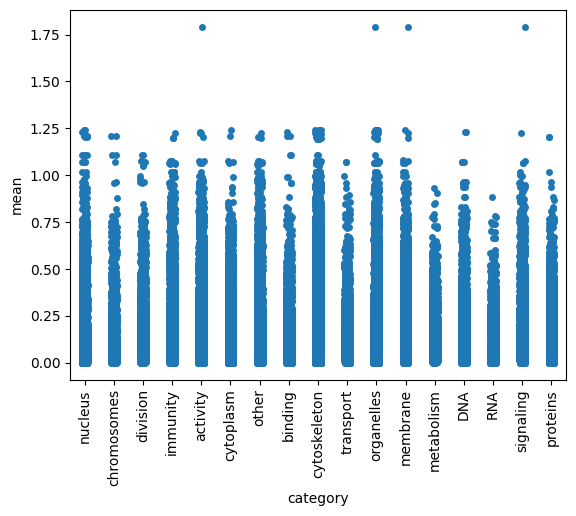

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(data = merged, x = 'category', y = 'mean')
plt.xticks(rotation=90)

In [221]:
weights = {
    'human-baboon': 28.8,
    'human-cow': 94,
    'human-dog': 94,
    'human-mouse': 87,
    'human-opossum': 160,
    'baboon-cow': 94,
    'baboon-dog': 94,
    'baboon-mouse': 87,
    'baboon-opossum': 160,
    'cow-dog': 76,
    'cow-mouse': 94,
    'cow-opossum': 160,
    'dog-mouse': 94,
    'dog-opossum': 160,
    'mouse-opossum': 160
}
dist_rate = pd.DataFrame()
for i in dist.columns:
   dist_rate[i] = dist[i].apply(lambda x: weights[i]/x)
dist_rate['mean_rate'] = dist_rate.mean(axis = 1)
display(dist_rate)

,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum,mean_rate
protein_id,,,,,,,,,,,,,,,,
A0A087WTH1,992.042989,606.459438,850.825029,441.725267,464.956788,652.718852,859.428571,374.915967,415.102465,548.791936,432.657345,410.826300,489.170596,433.779494,365.398581,555.919974
A0A087WZ39,277.804572,248.994750,239.842418,150.319559,169.887269,207.173949,188.699698,141.847903,148.598760,186.906694,198.115792,189.407167,178.833360,172.727233,149.322960,189.898806
A0A096LP49,179.029882,146.826364,148.363035,126.921882,69.124384,140.748061,146.365237,121.144945,71.858762,137.601889,114.239463,68.704057,121.143387,70.248522,64.676699,115.133105
A0A0U1RRA0,1716.533556,655.134442,859.436429,518.131629,293.847567,578.696578,732.400951,585.752085,298.396677,855.586076,512.376062,241.723975,1048.627302,287.668376,290.059480,631.624746
A0A126GWI2,465.657742,448.537482,532.237151,435.858642,578.714169,454.705965,547.068238,445.015064,594.064553,469.309621,441.523915,615.948445,507.745825,689.631392,632.521071,523.902618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y8,1427.014171,965.260877,1070.578454,598.287659,799.344537,1020.386010,1122.321055,607.274732,802.958904,1045.679692,681.989669,842.992624,695.822106,812.417806,660.085068,876.827558
Q9Y6Y9,367.914766,190.532945,276.179787,174.993966,193.286437,200.515367,268.251060,172.564950,206.485450,247.815312,180.435425,175.965528,204.766261,188.227544,170.696891,214.575446
Q9Y6Z7,2535.211268,1329.335898,1417.605453,692.956535,633.262091,1334.904924,1411.750571,671.394726,660.283922,1401.851920,655.417654,727.792106,661.403583,718.100624,569.684929,1028.063747


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'nucleus'),
  Text(1, 0, 'chromosomes'),
  Text(2, 0, 'division'),
  Text(3, 0, 'immunity'),
  Text(4, 0, 'activity'),
  Text(5, 0, 'cytoplasm'),
  Text(6, 0, 'other'),
  Text(7, 0, 'binding'),
  Text(8, 0, 'cytoskeleton'),
  Text(9, 0, 'transport'),
  Text(10, 0, 'organelles'),
  Text(11, 0, 'membrane'),
  Text(12, 0, 'metabolism'),
  Text(13, 0, 'DNA'),
  Text(14, 0, 'RNA'),
  Text(15, 0, 'signaling'),
  Text(16, 0, 'proteins')])

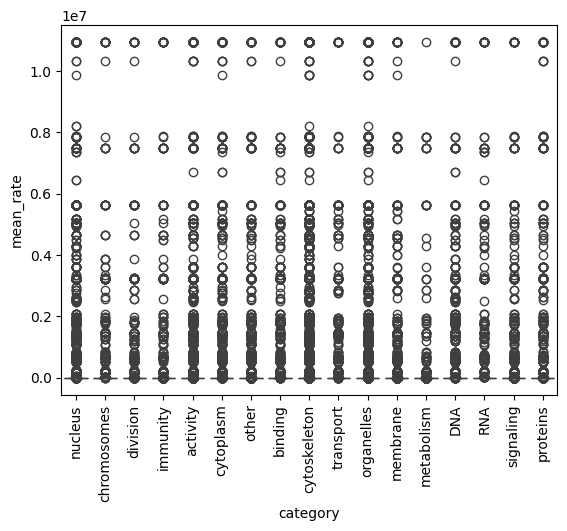

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

merged_rate = function_categories_final_tab.merge(dist_rate, on = 'protein_id')
sns.boxplot(data = merged_rate, x = 'category', y = 'mean_rate')
plt.xticks(rotation=90)

In [223]:
cats = ['DNA', 'RNA', 'membrane', 'organelle', 'signaling', 'immunity', 'transport', 'division']
filtered = merged[merged['category'].isin(cats)]
display(filtered)

,protein_id,category,function,go_id,mean
384,A0AVK6,division,mitotic cell cycle,GO:0000278,0.188366
385,A2A288,division,mitotic cell cycle,GO:0000278,0.450674
386,A2RUB1,division,mitotic cell cycle,GO:0000278,0.083730
387,A4D2B0,division,mitotic cell cycle,GO:0000278,0.274410
388,A6NDV4,division,mitotic cell cycle,GO:0000278,0.058735
...,...,...,...,...,...
148076,Q9Y4F3,RNA,"catalytic activity, acting on RNA",GO:0140098,0.135134
148077,Q9Y535,RNA,"catalytic activity, acting on RNA",GO:0140098,0.208183
148078,Q9Y606,RNA,"catalytic activity, acting on RNA",GO:0140098,0.252934
148079,Q9Y620,RNA,"catalytic activity, acting on RNA",GO:0140098,0.229148


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'division'),
  Text(1, 0, 'immunity'),
  Text(2, 0, 'transport'),
  Text(3, 0, 'membrane'),
  Text(4, 0, 'DNA'),
  Text(5, 0, 'RNA'),
  Text(6, 0, 'signaling')])

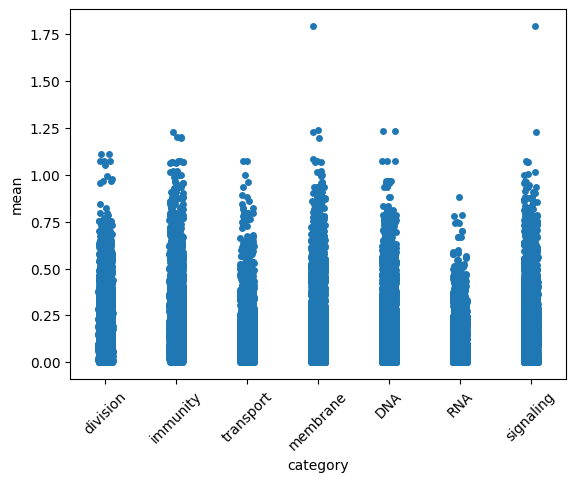

In [224]:
sns.stripplot(data=filtered, x = 'category', y = 'mean')
plt.xticks(rotation=45)

In [225]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AHarmanova/dataviz/refs/heads/main/prot_prop.txt'

t_m = pd.read_csv(
    url,
    sep='\t',           # Tab separator for TSV files

    names = ['protein_id', 'lenght', 'mol_weight', 'Tm']
)

proteins2 = []
temp = []
lenght = []
mol_weight = []
proteins = list(dist.index)
for i in proteins:
  if i in list(t_m.loc[:,'protein_id']):
   t = t_m[t_m['protein_id'] == i]['Tm'].values[0]
   temp.append(t)
   lenght.append(t_m[t_m['protein_id'] == i]['lenght'].values[0])
   mol_weight.append(t_m[t_m['protein_id'] == i]['mol_weight'].values[0])
   proteins2.append(i)
proteins_temp = pd.DataFrame()
mol_weight2 = []
for i in mol_weight:
  i = str(i)
  x = i.split(',')
  n = ('.'.join(x))
  mol_weight2.append(float(n))

proteins_temp['protein_id'] = proteins2
proteins_temp['Tm'] = temp
proteins_temp['lenght'] = lenght
proteins_temp['mol_weight'] = mol_weight2
proteins_temp['Tm'] = proteins_temp['Tm'].astype(float)
proteins_temp['lenght'] = proteins_temp['lenght'].astype(float)
proteins_temp['mol_weight'] = proteins_temp['mol_weight'].astype(float)
proteins_temp = proteins_temp[~(proteins_temp.iloc[:, 1:] <= 0).any(axis=1)]
display(proteins_temp)

,protein_id,Tm,lenght,mol_weight
0,A0AVT1,58.86,1052.0,117.970
1,A0MZ66,58.49,631.0,71.640
2,O00151,60.81,329.0,36.072
3,O00231,60.17,422.0,47.464
4,O00232,59.40,456.0,52.904
...,...,...,...,...
691,Q9Y5K6,52.69,639.0,71.451
692,Q9Y617,59.34,370.0,40.423
693,Q9Y678,51.49,874.0,97.718
694,Q9Y680,59.19,222.0,25.794


In [226]:
merged_all = filtered.merge(proteins_temp, on = 'protein_id')
display(merged_all)

,protein_id,category,function,go_id,mean,Tm,lenght,mol_weight
0,O14497,division,mitotic cell cycle,GO:0000278,0.043971,59.39,2285.0,242.045
1,O14744,division,mitotic cell cycle,GO:0000278,0.026998,60.25,637.0,72.684
2,O14974,division,mitotic cell cycle,GO:0000278,0.054125,60.43,1030.0,115.281
3,O43660,division,mitotic cell cycle,GO:0000278,0.057803,59.42,514.0,57.194
4,O43715,division,mitotic cell cycle,GO:0000278,0.032564,58.45,76.0,8.786
...,...,...,...,...,...,...,...,...
1673,Q9NR30,RNA,"catalytic activity, acting on RNA",GO:0140098,0.184812,60.58,783.0,87.344
1674,Q9NSD9,RNA,"catalytic activity, acting on RNA",GO:0140098,0.101208,57.93,589.0,66.116
1675,Q9NSE4,RNA,"catalytic activity, acting on RNA",GO:0140098,0.192352,54.39,1012.0,113.792
1676,Q9Y2L1,RNA,"catalytic activity, acting on RNA",GO:0140098,0.091887,49.08,958.0,109.003


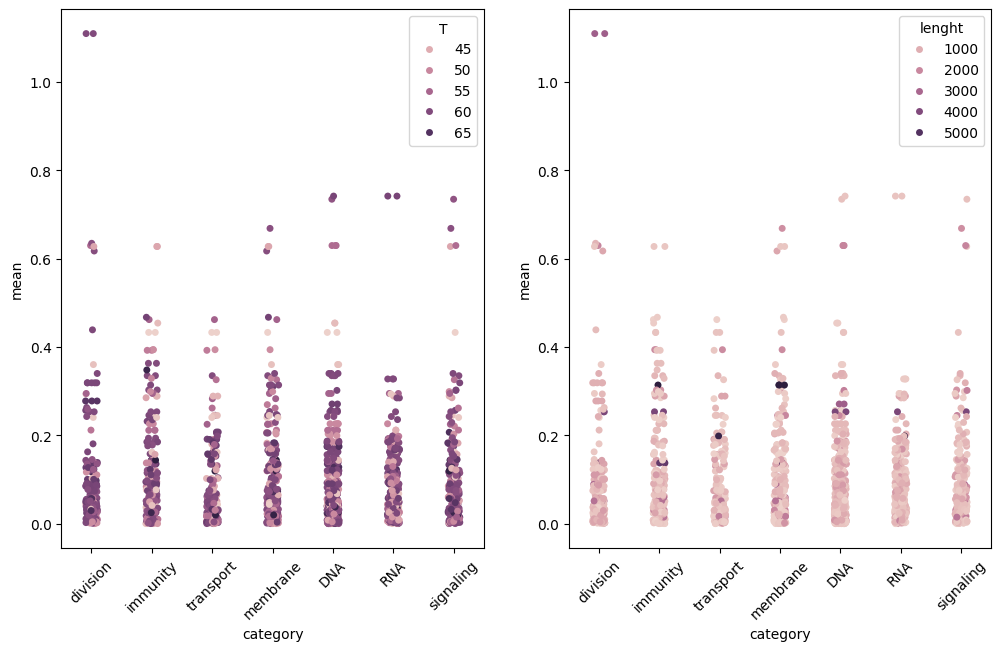

In [227]:
figure, axes = plt.subplots(1, 2, figsize= (12, 7))
sns.stripplot(ax = axes[0], data=merged_all, x = 'category', y = 'mean', hue = 'Tm')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title = 'T', loc='upper right')
sns.stripplot(ax=axes[1], data=merged_all, x='category', y='mean', hue='lenght')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title = 'lenght', loc='upper right')

In [228]:
#skusim zistit ci je nejaka korelacia medzi dist a poctom go ids

In [229]:
go_id_count = id.index.value_counts().reset_index()
means_df = means_df[~(means_df.iloc[:, 1:] <= 0).any(axis=1)]
go_id_dist = go_id_count.merge(means_df, on='protein_id')
go_id_dist2 = go_id_dist.merge(merged_all, on='protein_id')
#P62805 vyzera byt dolezity!!


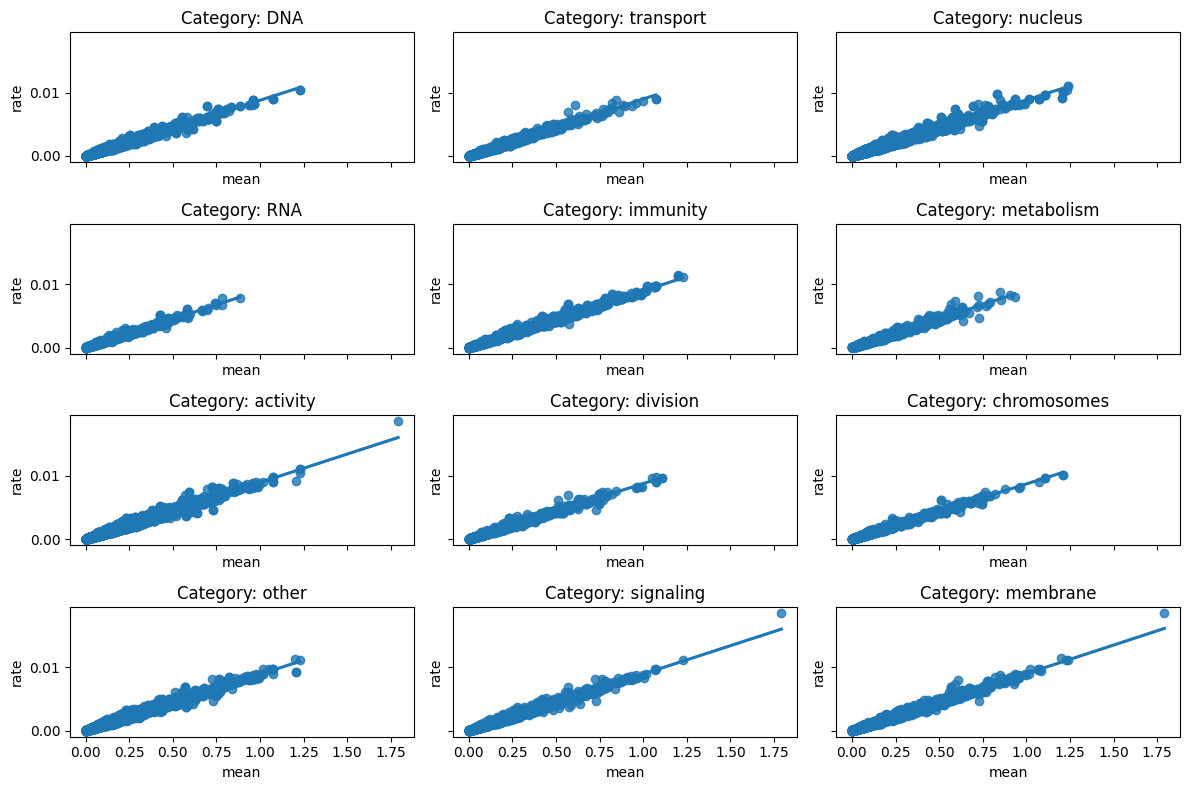

In [230]:
weights = {
    'human-baboon': 28.8,
    'human-cow': 94,
    'human-dog': 94,
    'human-mouse': 87,
    'human-opossum': 160,
    'baboon-cow': 94,
    'baboon-dog': 94,
    'baboon-mouse': 87,
    'baboon-opossum': 160,
    'cow-dog': 76,
    'cow-mouse': 94,
    'cow-opossum': 160,
    'dog-mouse': 94,
    'dog-opossum': 160,
    'mouse-opossum': 160
}
ev_rate = dist.apply(lambda x: x/[weights[col] for col in dist.columns], axis=1)
ev_mean = ev_rate.mean(axis=1).reset_index()
ev_mean2 = means_df.merge(ev_mean, on='protein_id')

ev_mean2 = ev_mean2.set_index('protein_id')
ev_mean2.columns = ['mean', 'rate']
ev_mean_merged = ev_mean2.merge(function_categories_final_tab, on='protein_id')
cat_list = 'DNA,transport,nucleus,RNA,immunity,metabolism,activity,division,chromosomes,other,signaling,membrane'.split(',')

fig, axes = plt.subplots(4, 3, figsize=(12, 8), sharey= True, sharex=True)
axes = axes.flatten()
for i, category in enumerate(cat_list):
  axes[i] = sns.regplot(data = ev_mean_merged[ev_mean_merged['category'] == category], x='mean', y='rate', ax=axes[i])
  axes[i].set_title(f"Category: {category.strip()}")
plt.tight_layout()
plt.show()

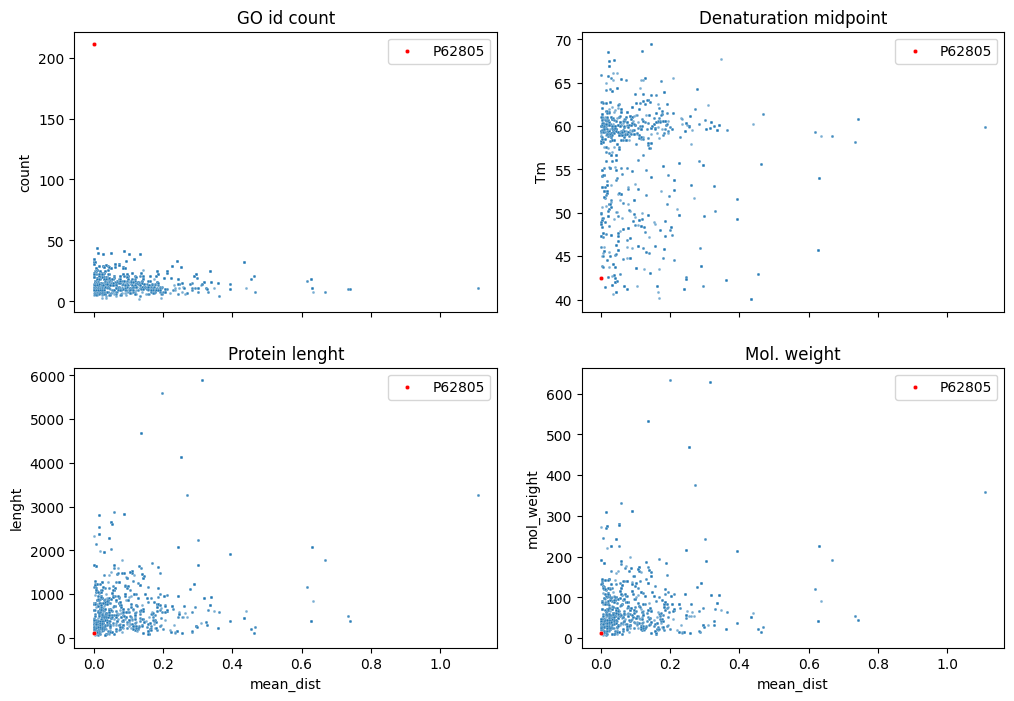

In [238]:
figure, axes = plt.subplots(2,2, figsize=(12, 8), sharex = True)
sns.scatterplot(go_id_dist2, x = 'mean_x', y = 'count', s = 4, alpha = 0.6, ax = axes[0, 0])
highlight = go_id_dist2[go_id_dist2['protein_id']=='P62805']
sns.scatterplot(x=[highlight['mean_x'].values[0]], y=[highlight['count'].values[0]], color='red', s=10, marker='o', label='P62805', ax = axes[0, 0] )
sns.scatterplot(go_id_dist2, x = 'mean_x', y = 'Tm', s = 4, alpha = 0.6, ax = axes[0, 1])
sns.scatterplot(x=[highlight['mean_x'].values[0]], y=[highlight['Tm'].values[0]], color='red', s=10, marker='o', label='P62805', ax=axes[0, 1])
sns.scatterplot(go_id_dist2, x = 'mean_x', y = 'lenght', s = 4, alpha = 0.6, ax = axes[1, 0])
sns.scatterplot(x=[highlight['mean_x'].values[0]], y=[highlight['lenght'].values[0]], color='red', s=10, marker='o', label='P62805', ax=axes[1, 0])
sns.scatterplot(go_id_dist2, x = 'mean_x', y = 'mol_weight', s = 4, alpha = 0.6, ax = axes[1, 1])
sns.scatterplot(x=[highlight['mean_x'].values[0]], y=[highlight['mol_weight'].values[0]], color='red', s=10, marker='o', label='P62805', ax=axes[1, 1])
axes[0,0].set_title('GO id count')
axes[0,1].set_title('Denaturation midpoint')
axes[1,0].set_title('Protein lenght')
axes[1,1].set_title('Mol. weight')
for i in (0, 1):
  for j in (0, 1):
    axes[i,j].set_xlabel('mean_dist')